# Visualizing FordGoBike Data
## by Mohammed Alsenani (Jan - Dec 2018)

## Preliminary Wrangling

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

>Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [49]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import glob
import os
import datetime

%matplotlib inline

> I saved the csv files from the FordGoBike website in one location on my computer. I then used the glob and os modules to store, load, and combine the files into one new file, fordgo_master.csv

In [50]:
#download the data
path = r'C:\Users\lenovo-pc\Project Template\FordGoBikeData'

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('fordgo_master.csv', index = False)

In [51]:
df = pd.read_csv('fordgo_master.csv')

# Showing the first five rows of new dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [52]:
# Showing the last five rows of new dataset
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No
1863720,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,No


In [53]:
#some information
df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  bike_share_for_all_trip  1863721 non-null 

In [54]:
#knowing number of rows of the dataset
df.shape[0]

1863721

In [55]:
#some statical information
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [56]:
#search for duplication
df.duplicated().sum()

0

0 means there is no duplicated values

In [57]:
#search for null values
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

There is some missing values

In [58]:
# Changing the format to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [59]:
# Start time month (January - December)
df['start_time_month'] = df['start_time'].dt.strftime('%B')

In [60]:
# Start time month (1-12)
df['start_time_month_num'] = df['start_time'].dt.month.astype(int)

In [61]:
# initiate start time weekday
df['start_time_weekday'] = df['start_time'].dt.strftime('%a')

In [62]:
# Start and end time in hour
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [63]:
# Duration in seconds to duration in minutes
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(int)

In [64]:
df.to_csv('fordgo_master_clean.csv', index = False)

### What is the structure of your dataset?

> The FordGoBike data is intuitive to understand. This data has been collected efficiently, helps to extract a huge informations.

> The columns:
- Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- bike_share_for_all_trip

> I add
- Start Time Month	
- Start Time Month Number	
- Start Time Day of the Week	
- Start Time Hour
- Duration Min


### What is/are the main feature(s) of interest in your dataset?

> The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also data about the users whether they are subscriptions or normal customers. These features can be used to make business decisions such as which day of the week bikes should be most available. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end times, and related time-based information will be utilized heavily. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [65]:
# setting to the variable no_color
no_color = sb.color_palette()[0]

In [66]:
# Before we visualize our data, let's see what kind of numbers we're looking at
df.start_time_month.describe()

count     1863721
unique         12
top       October
freq       201458
Name: start_time_month, dtype: object

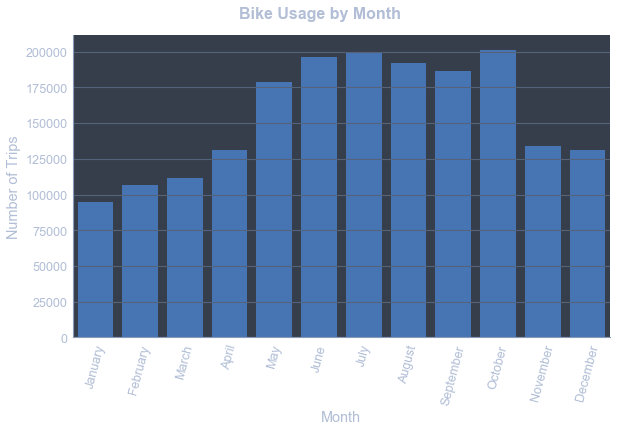

In [67]:
# Monthly usage of the Bike system
graph = sb.catplot(data = df, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Trips'),

graph.fig.suptitle('Bike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

graph.set_xticklabels(rotation=75);

> Not surprisingly, the summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system.

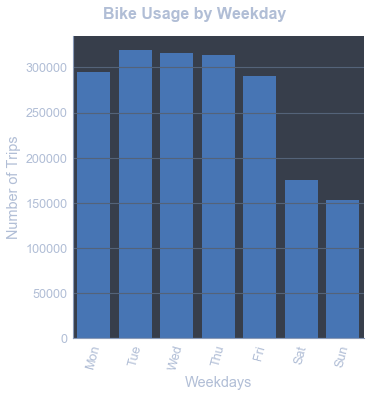

In [68]:
# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.catplot(data=df, x='start_time_weekday', kind='count', color = no_color, order = weekday)

graph.set_axis_labels('Weekdays', 'Number of Trips')

graph.fig.suptitle('Bike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=75);

>Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days

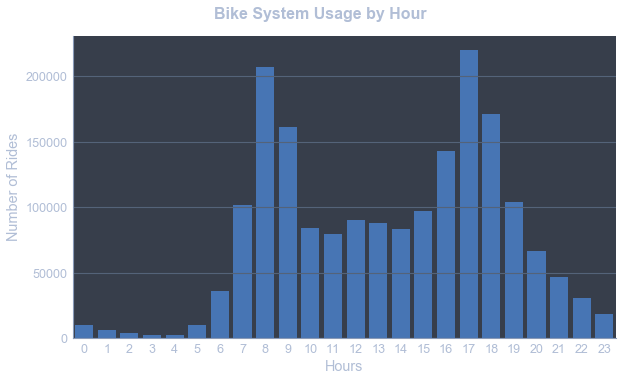

In [69]:
# Hourly usage of the Bike System
graph = sb.catplot(data = df, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Rides')

graph.fig.suptitle('Bike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

>The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters.

In [70]:
df.duration_min.describe()

count    1.863721e+06
mean     1.379682e+01
std      3.950700e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.439000e+03
Name: duration_min, dtype: float64

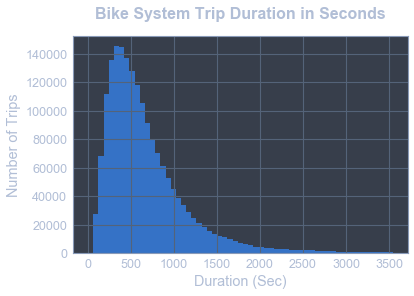

In [71]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df, x = 'duration_sec', bins = bin_edges);

plt.title("Bike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Trips');

In [72]:
df.duration_min.describe(percentiles = [.95])
df.duration_min.describe()

count    1.863721e+06
mean     1.379682e+01
std      3.950700e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.439000e+03
Name: duration_min, dtype: float64

In [73]:
df.duration_min.mean()

13.796815081227287

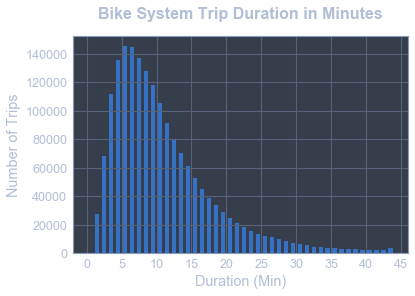

In [74]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Bike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Trips');

>The average trip is just under 12.5 minutes, with 75% of trips being under 14 minutes. Looking at the histogram, most rides fall in between the 3 - 11 minute range. This suggests riders are taking the bikes short distances.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Thankfully, due to thorough cleaning efforts there were no big surprises during the exploratory and visualization phase.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that adults in the average working age range are the primary user base for the system

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [75]:
# Customers vs Subscribers
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df['bike_id'].count()
subscriber_prop = subscriber / df['bike_id'].count()

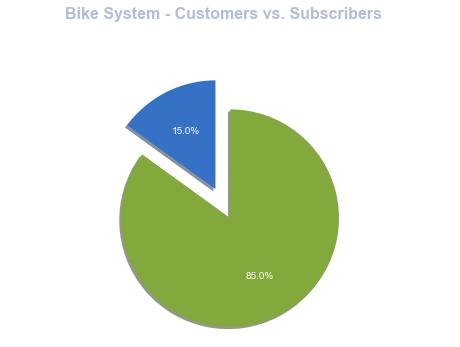

In [76]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Bike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

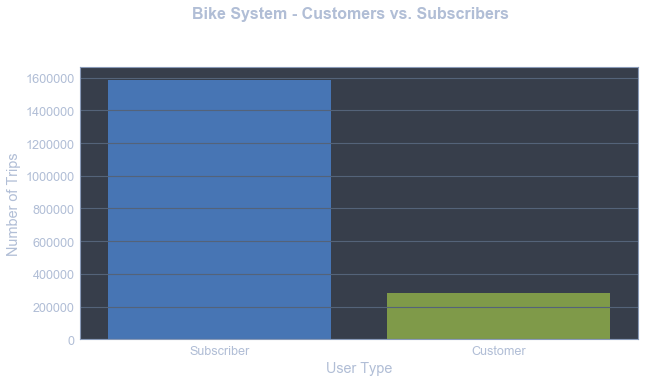

In [77]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df, x = "user_type", order = df.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Trips');
plt.suptitle('Bike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

> The majority of users for the Ford Go Bike System are Subscribers i.e. customers who pay by trip $2

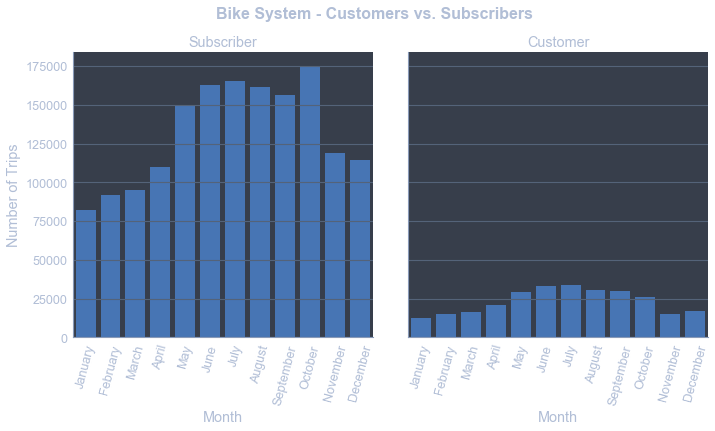

In [78]:
# Customer Usage by Month vs. Subscriber Usage by Month
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df, x='start_time_month', col="user_type", kind='count', sharey = True, color = no_color);

graph.set_axis_labels("Month", "Number of Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Bike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

> Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather.

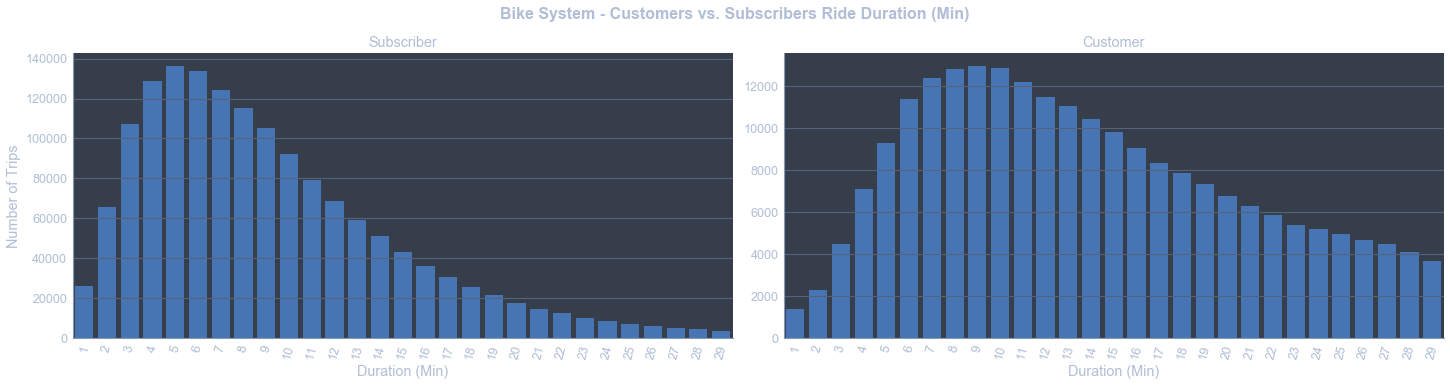

In [79]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df.query('duration_min < 30')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Bike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

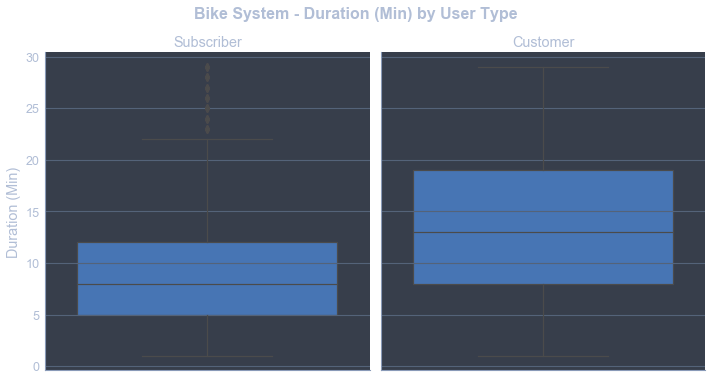

In [80]:
data = df.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

>The plots above show the ride duration spread in minutes (note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Customer typically have trip durations are longer (8 to 18 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends, and peaks during the month of July.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, which may be for longer trips around the surrounding area.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

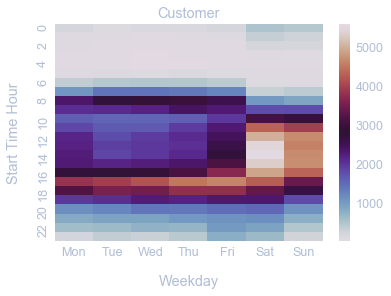

In [81]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['start_time_weekday'] = pd.Categorical(df['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

#plt.figure(figsize=(15,8))

# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

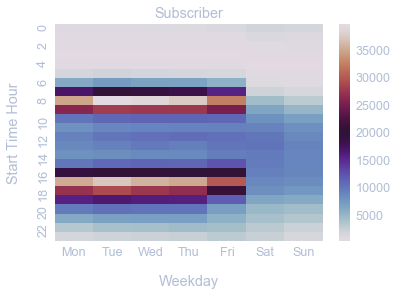

In [82]:
# Heatmap - Subscribers
#plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

>Customers use the bike sharing system more often on weekends, while Subscribers primarily use the bikes on weekdays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This section essentially amplified the previous data topics of exploration through different visuals and adding in more variables to compare to other variables. The heatmap didn't reveal anything new for the time based discussion on when and what time each user group uses the bike sharing system. As previously noted, Customers use the system at almost the opposite time as the Subscribers.

### Were there any interesting or surprising interactions between features?

> Nothing out of the expected here.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!